<a href="https://colab.research.google.com/github/ShathaAlshalawi/Gallstone_project/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Step 2: Upload file
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataset-uci.csv")
print(df.head())

Saving dataset-uci.csv to dataset-uci.csv
   Gallstone Status  Age  Gender  Comorbidity  Coronary Artery Disease (CAD)  \
0                 0   50       0            0                              0   
1                 0   47       0            1                              0   
2                 0   61       0            0                              0   
3                 0   41       0            0                              0   
4                 0   42       0            0                              0   

   Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)  Height  Weight  \
0               0               0                       0     185    92.8   
1               0               0                       0     176    94.5   
2               0               0                       0     171    91.1   
3               0               0                       0     168    67.7   
4               0               0                       0     178    89.6   

   ...  High D

In [7]:
# Step 3: Read the dataset
df = pd.read_csv("dataset-uci.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (319, 39)


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [8]:
# Step 4: Five Number Summary (for numeric columns)
summary = df.describe().T[["min", "25%", "50%", "75%", "max"]]
print("Five Number Summary:")
print(summary)

Five Number Summary:
                                                   min      25%         50%  \
Gallstone Status                                  0.00    0.000    0.000000   
Age                                              20.00   38.500   49.000000   
Gender                                            0.00    0.000    0.000000   
Comorbidity                                       0.00    0.000    0.000000   
Coronary Artery Disease (CAD)                     0.00    0.000    0.000000   
Hypothyroidism                                    0.00    0.000    0.000000   
Hyperlipidemia                                    0.00    0.000    0.000000   
Diabetes Mellitus (DM)                            0.00    0.000    0.000000   
Height                                          145.00  159.500  168.000000   
Weight                                           42.90   69.600   78.800000   
Body Mass Index (BMI)                            17.40   25.250   28.300000   
Total Body Water (TBW)         

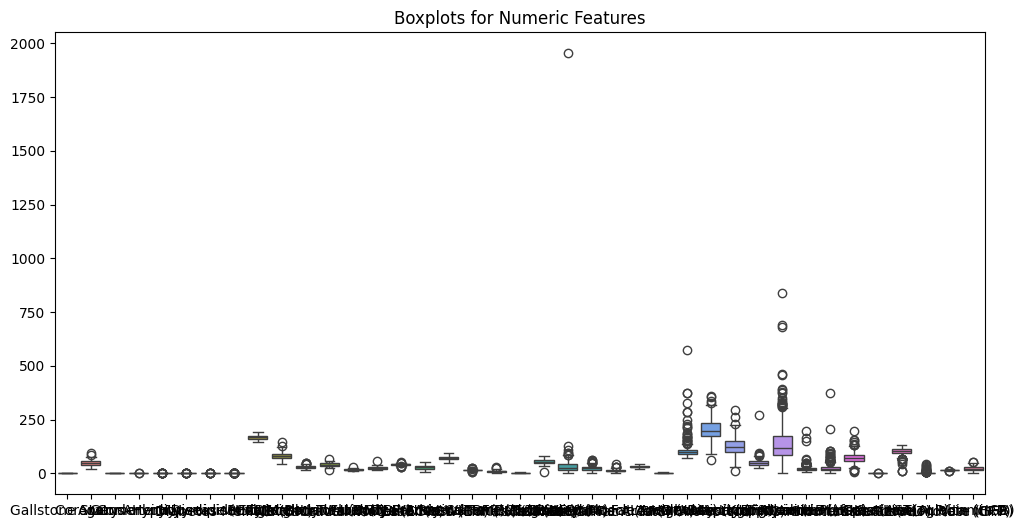

Outliers detected per column:
Gallstone Status: 0 outliers
Age: 2 outliers
Gender: 0 outliers
Comorbidity: 2 outliers
Coronary Artery Disease (CAD): 12 outliers
Hypothyroidism: 9 outliers
Hyperlipidemia: 8 outliers
Diabetes Mellitus (DM): 43 outliers
Height: 0 outliers
Weight: 2 outliers
Body Mass Index (BMI): 5 outliers
Total Body Water (TBW): 2 outliers
Extracellular Water (ECW): 1 outliers
Intracellular Water (ICW): 1 outliers
Extracellular Fluid/Total Body Water (ECF/TBW): 7 outliers
Total Body Fat Ratio (TBFR) (%): 0 outliers
Lean Mass (LM) (%): 0 outliers
Body Protein Content (Protein) (%): 8 outliers
Visceral Fat Rating (VFR): 3 outliers
Bone Mass (BM): 0 outliers
Muscle Mass (MM): 1 outliers
Obesity (%): 7 outliers
Total Fat Content (TFC): 7 outliers
Visceral Fat Area (VFA): 5 outliers
Visceral Muscle Area (VMA) (Kg): 0 outliers
Hepatic Fat Accumulation (HFA): 0 outliers
Glucose: 25 outliers
Total Cholesterol (TC): 5 outliers
Low Density Lipoprotein (LDL): 4 outliers
High Densi

In [9]:
# Step 5: Boxplots for numeric columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.title("Boxplots for Numeric Features")
plt.show()

# Step 6: Detect outliers using IQR method
outliers = {}
for col in df.select_dtypes(include="number").columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].values

print("Outliers detected per column:")
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")


Missing values per column:
Series([], dtype: int64)


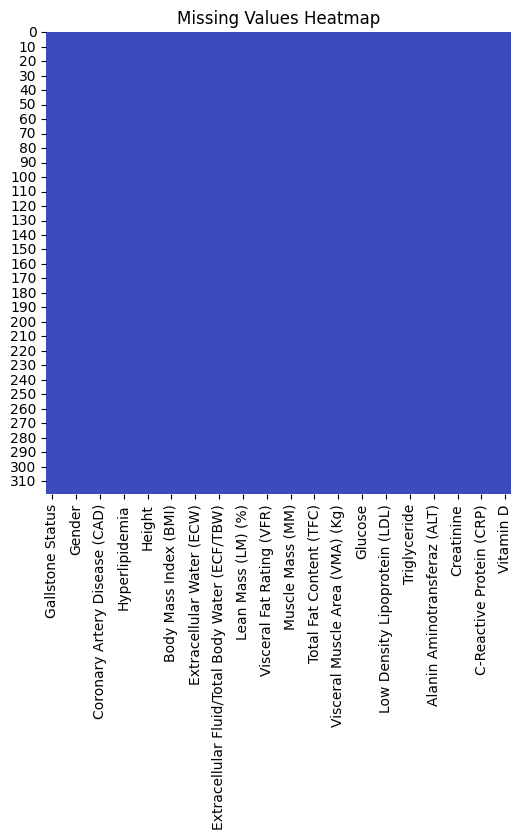

In [14]:
# Step 7: Missing values count
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

# Step 8: Visualize missing values
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()


In [15]:
# Step 9: Save the dataset
df.to_csv("Preprocessed_dataset.csv", index=False)
